<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
# Step 2: Examine the Structure of the Data
print("=== STEP 2: EXAMINE THE STRUCTURE OF THE DATA ===\n")

# Display column names and data types
print("Column names and data types:")
print(df.dtypes)

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
display(df.describe())

# Display basic statistics for categorical columns
print("\nBasic statistics for categorical columns (first 10):")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:10]:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

# Check for missing values
print("\nMissing values summary:")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
print("\nColumns with missing values (top 10):")
print(missing_values[missing_values > 0].sort_values(ascending=False).head(10))

# Display dataset structure overview
print("\nDataset structure overview:")
print(f"Total memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Number of numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Number of categorical columns: {len(df.select_dtypes(include=['object']).columns)}")

=== STEP 2: EXAMINE THE STRUCTURE OF THE DATA ===

Column names and data types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Basic statistics for numerical columns:


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000



Basic statistics for categorical columns (first 10):

MainBranch:
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

Age:
Age
25-34 years old    23911
35-44 years old    14942
18-24 years old    14098
45-54 years old     6249
55-64 years old     2575
Name: count, dtype: int64

Employment:
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                      

NameError: name 'np' is not defined

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
# Step 3: Handle Missing Data and Data Cleaning
print("=== STEP 3: HANDLE MISSING DATA AND DATA CLEANING ===\n")

# Define critical columns to handle
critical_columns = ['Employment', 'JobSat', 'RemoteWork', 'YearsCodePro', 'EdLevel', 'Country']

print("Handling missing values in critical columns:")
for col in critical_columns:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            if df[col].dtype == 'object':
                df[col].fillna('Unknown', inplace=True)
                print(f"✓ Filled {missing_count} missing values in '{col}' with 'Unknown'")
            else:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"✓ Filled {missing_count} missing values in '{col}' with median: {median_val}")

# Handle remaining missing values
remaining_missing = df.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\nHandling {remaining_missing} remaining missing values...")
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col].fillna('Unknown', inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)

print(f"\nMissing values after cleaning: {df.isnull().sum().sum()}")

# Display sample of cleaned data
print("\nSample of cleaned data:")
display(df.head(3))

=== STEP 3: HANDLE MISSING DATA AND DATA CLEANING ===

Handling missing values in critical columns:
✓ Filled 36311 missing values in 'JobSat' with median: 7.0
✓ Filled 10631 missing values in 'RemoteWork' with 'Unknown'
✓ Filled 13827 missing values in 'YearsCodePro' with 'Unknown'
✓ Filled 4653 missing values in 'EdLevel' with 'Unknown'
✓ Filled 6507 missing values in 'Country' with 'Unknown'


/tmp/ipykernel_1469/2077962520.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_1469/2077962520.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Handling 2819028 remaining missing values...


/tmp/ipykernel_1469/2077962520.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/tmp/ipykernel_1469/2077962520.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '


Missing values after cleaning: 0

Sample of cleaned data:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Unknown,...,20.0,15.0,10.0,5.0,0.0,0.0,Unknown,Unknown,65000.0,7.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,65000.0,7.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,20.0,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [13]:
# Step 4: Analyze Key Columns
print("=== STEP 4: ANALYZE KEY COLUMNS ===\n")

key_columns = ['Employment', 'JobSat', 'YearsCodePro']

for col in key_columns:
    if col in df.columns:
        print(f"Distribution of {col}:")
        value_counts = df[col].value_counts()
        total = len(df[col].dropna())
        
        for value, count in value_counts.items():
            percentage = (count / total) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
        print(f"Missing values: {df[col].isnull().sum()}\n")
    else:
        print(f"Column '{col}' not found in dataset\n")

=== STEP 4: ANALYZE KEY COLUMNS ===

Distribution of Employment:
  Employed, full-time: 39041 (59.7%)
  Independent contractor, freelancer, or self-employed: 4846 (7.4%)
  Student, full-time: 4709 (7.2%)
  Employed, full-time;Independent contractor, freelancer, or self-employed: 3557 (5.4%)
  Not employed, but looking for work: 2341 (3.6%)
  Employed, part-time: 1266 (1.9%)
  Student, full-time;Employed, part-time: 1115 (1.7%)
  Employed, full-time;Student, full-time: 897 (1.4%)
  Employed, full-time;Student, part-time: 839 (1.3%)
  Student, full-time;Not employed, but looking for work: 686 (1.0%)
  Not employed, and not looking for work: 633 (1.0%)
  Student, part-time;Employed, part-time: 558 (0.9%)
  I prefer not to say: 546 (0.8%)
  Retired: 525 (0.8%)
  Student, part-time: 494 (0.8%)
  Independent contractor, freelancer, or self-employed;Employed, part-time: 401 (0.6%)
  Not employed, but looking for work;Independent contractor, freelancer, or self-employed: 383 (0.6%)
  Student, 

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


=== STEP 5: VISUALIZE JOB SATISFACTION ===



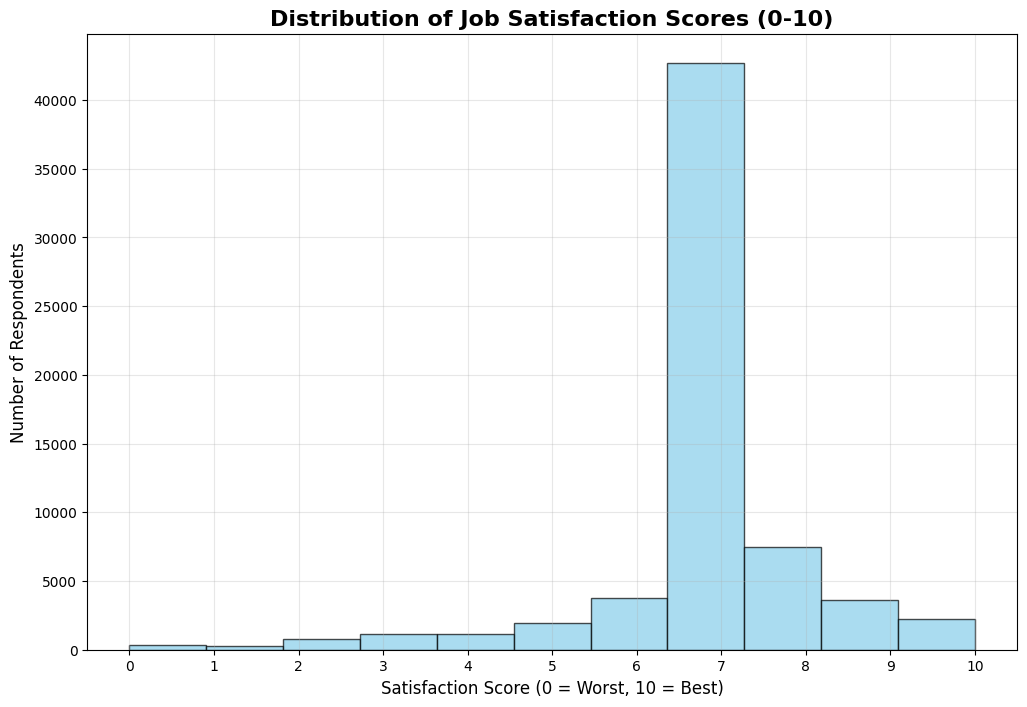

INTERPRETATION:
• The distribution shows the proportion of respondents in each satisfaction category
• Higher values indicate better job satisfaction
• Look for patterns: are most respondents satisfied or dissatisfied?
• Note any significant clusters or outliers in the distribution


In [14]:
# Step 5: Visualize Job Satisfaction
print("=== STEP 5: VISUALIZE JOB SATISFACTION ===\n")

if 'JobSat' in df.columns:
    # Check if JobSat is numeric or categorical
    if df['JobSat'].dtype == 'object':
        # Categorical satisfaction data
        satisfaction_counts = df['JobSat'].value_counts()
        
        plt.figure(figsize=(12, 8))
        colors = ['#ff6b6b', '#ffa8a8', '#feca57', '#48dbfb', '#1dd1a1']
        wedges, texts, autotexts = plt.pie(satisfaction_counts.values, labels=satisfaction_counts.index, 
                                          autopct='%1.1f%%', colors=colors[:len(satisfaction_counts)], 
                                          startangle=90)
        plt.title('Distribution of Job Satisfaction Levels', fontsize=16, fontweight='bold')
        
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        plt.show()
        
    else:
        # Numeric satisfaction data (0-10 scale)
        df['JobSat_numeric'] = pd.to_numeric(df['JobSat'], errors='coerce')
        valid_sat = df['JobSat_numeric'].dropna()
        
        plt.figure(figsize=(12, 8))
        plt.hist(valid_sat, bins=11, range=(0, 10), alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('Distribution of Job Satisfaction Scores (0-10)', fontsize=16, fontweight='bold')
        plt.xlabel('Satisfaction Score (0 = Worst, 10 = Best)', fontsize=12)
        plt.ylabel('Number of Respondents', fontsize=12)
        plt.xticks(range(0, 11))
        plt.grid(alpha=0.3)
        plt.show()
    
    # Interpretation
    print("INTERPRETATION:")
    print("• The distribution shows the proportion of respondents in each satisfaction category")
    print("• Higher values indicate better job satisfaction")
    print("• Look for patterns: are most respondents satisfied or dissatisfied?")
    print("• Note any significant clusters or outliers in the distribution")
    
else:
    print("JobSat column not found in dataset")

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


=== STEP 6: PROGRAMMING LANGUAGES ANALYSIS ===

Top 15 Languages Worked With:
  JavaScript: 37492 (57.3%)
  HTML/CSS: 31816 (48.6%)
  Python: 30719 (46.9%)
  SQL: 30682 (46.9%)
  TypeScript: 23150 (35.4%)
  Bash/Shell (all shells): 20412 (31.2%)
  Java: 18239 (27.9%)
  C#: 16318 (24.9%)
  C++: 13827 (21.1%)
  C: 12184 (18.6%)
  PHP: 10951 (16.7%)
  PowerShell: 8328 (12.7%)
  Go: 8103 (12.4%)
  Rust: 7559 (11.6%)
  Unknown: 5692 (8.7%)

Top 15 Languages Want to Work With:
  Python: 25047 (38.3%)
  JavaScript: 23774 (36.3%)
  SQL: 22400 (34.2%)
  HTML/CSS: 20721 (31.7%)
  TypeScript: 20239 (30.9%)
  Rust: 17232 (26.3%)
  Go: 13837 (21.1%)
  Bash/Shell (all shells): 13744 (21.0%)
  C#: 12921 (19.7%)
  C++: 10873 (16.6%)
  Java: 10668 (16.3%)
  Unknown: 9685 (14.8%)
  C: 8275 (12.6%)
  Kotlin: 7379 (11.3%)
  PHP: 5745 (8.8%)


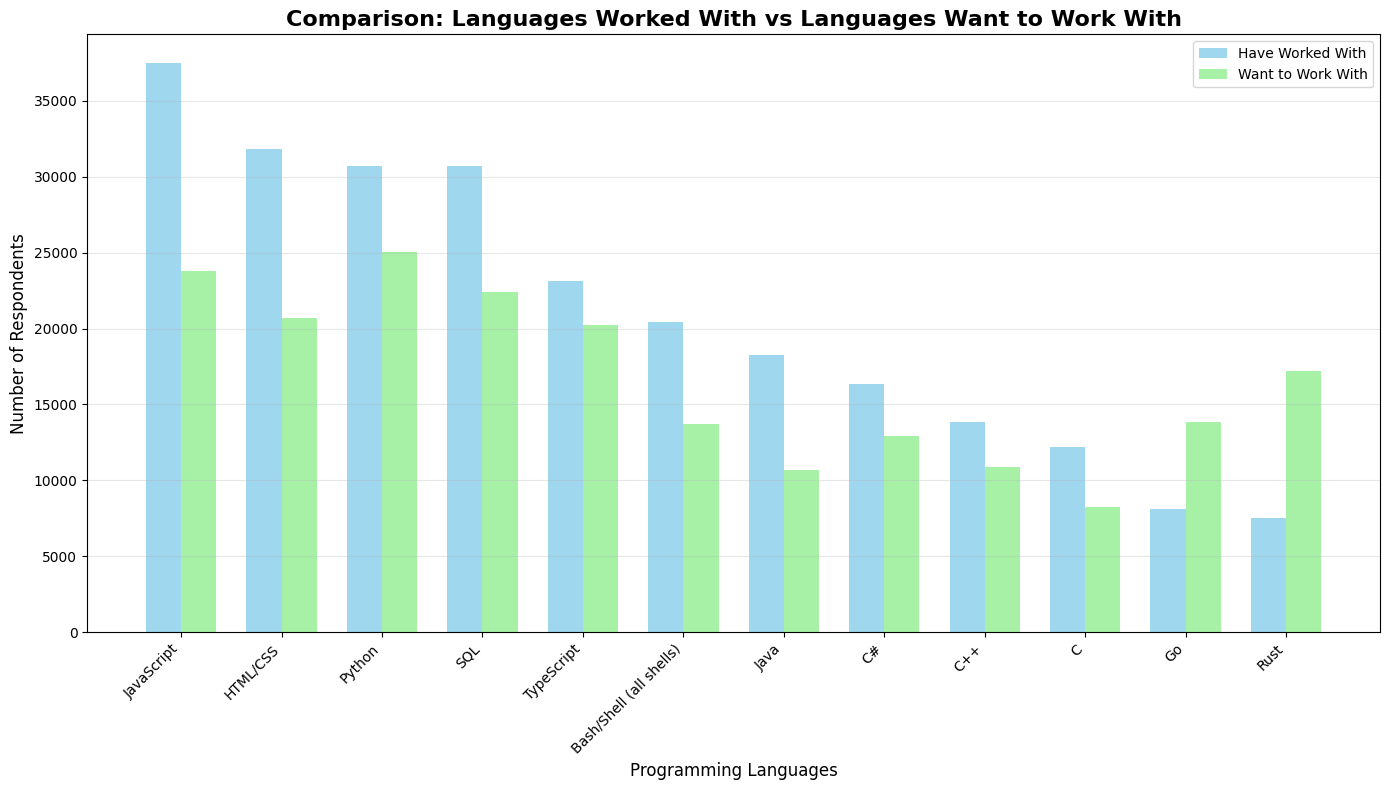


Languages with largest popularity gap (Want - Have):


ValueError: Unknown format code 'd' for object of type 'float'

In [19]:
# Step 6: Programming Languages Analysis (Corrected)
print("=== STEP 6: PROGRAMMING LANGUAGES ANALYSIS ===\n")

import numpy as np  # Add numpy import

def extract_languages(series):
    """Extract and count languages from semicolon-separated strings"""
    all_languages = []
    for languages in series.dropna():
        if isinstance(languages, str):
            lang_list = languages.split(';')
            all_languages.extend([lang.strip() for lang in lang_list])
    return pd.Series(all_languages).value_counts()

# Analyze languages worked with
if 'LanguageHaveWorkedWith' in df.columns:
    worked_languages = extract_languages(df['LanguageHaveWorkedWith']).head(15)
    print("Top 15 Languages Worked With:")
    for lang, count in worked_languages.items():
        percentage = (count / len(df)) * 100
        print(f"  {lang}: {count} ({percentage:.1f}%)")

# Analyze languages wanted to work with
if 'LanguageWantToWorkWith' in df.columns:
    wanted_languages = extract_languages(df['LanguageWantToWorkWith']).head(15)
    print("\nTop 15 Languages Want to Work With:")
    for lang, count in wanted_languages.items():
        percentage = (count / len(df)) * 100
        print(f"  {lang}: {count} ({percentage:.1f}%)")

# Create grouped bar chart
if 'LanguageHaveWorkedWith' in df.columns and 'LanguageWantToWorkWith' in df.columns:
    # Get top 10 languages from both categories
    top_worked = worked_languages.head(10)
    top_wanted = wanted_languages.head(10)
    
    # Get union of top languages
    all_top_languages = list(set(top_worked.index) | set(top_wanted.index))
    
    # Create comparison dataframe
    comparison_data = pd.DataFrame({
        'Worked_With': [worked_languages.get(lang, 0) for lang in all_top_languages],
        'Want_to_Work_With': [wanted_languages.get(lang, 0) for lang in all_top_languages]
    }, index=all_top_languages)
    
    # Sort by worked_with count
    comparison_data = comparison_data.sort_values('Worked_With', ascending=False)
    
    # Plot grouped bar chart
    plt.figure(figsize=(14, 8))
    x = np.arange(len(comparison_data))
    width = 0.35
    
    plt.bar(x - width/2, comparison_data['Worked_With'], width, label='Have Worked With', alpha=0.8, color='skyblue')
    plt.bar(x + width/2, comparison_data['Want_to_Work_With'], width, label='Want to Work With', alpha=0.8, color='lightgreen')
    
    plt.xlabel('Programming Languages', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.title('Comparison: Languages Worked With vs Languages Want to Work With', fontsize=16, fontweight='bold')
    plt.xticks(x, comparison_data.index, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate popularity gap
    comparison_data['Popularity_Gap'] = comparison_data['Want_to_Work_With'] - comparison_data['Worked_With']
    comparison_data['Gap_Percentage'] = (comparison_data['Popularity_Gap'] / comparison_data['Worked_With']) * 100
    
    print("\nLanguages with largest popularity gap (Want - Have):")
    for lang, row in comparison_data.nlargest(5, 'Popularity_Gap').iterrows():
        print(f"  {lang}: {row['Popularity_Gap']:+d} ({(row['Gap_Percentage']):+.1f}%)")
    
    print("\nLanguages with smallest popularity gap (Want - Have):")
    for lang, row in comparison_data.nsmallest(5, 'Popularity_Gap').iterrows():
        print(f"  {lang}: {row['Popularity_Gap']:+d} ({(row['Gap_Percentage']):+.1f}%)")
        
else:
    print("Language columns not found in dataset")

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


=== STEP 7: ANALYZE REMOTE WORK TRENDS ===



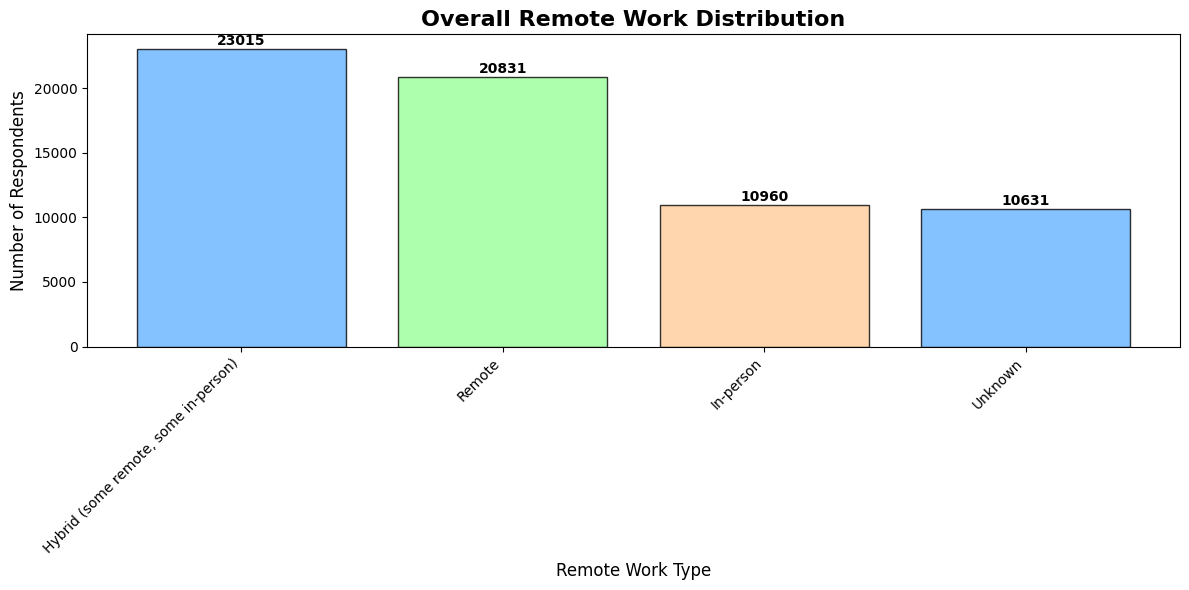

<Figure size 1400x800 with 0 Axes>

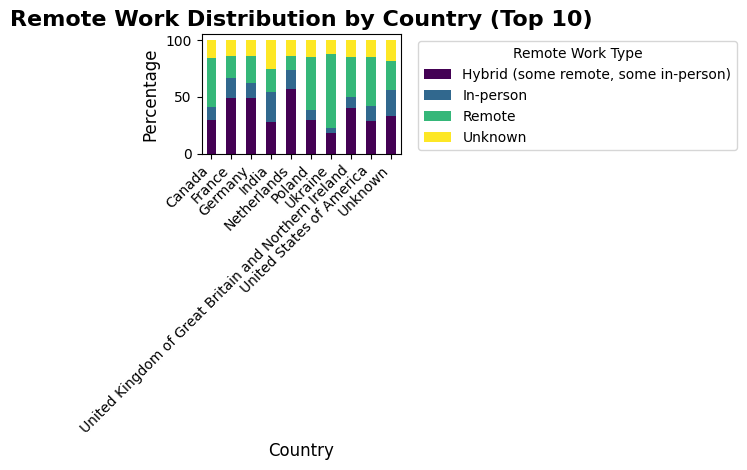

Remote Work Adoption by Country:
  Netherlands: 57.2%
  France: 49.3%
  Germany: 48.9%
  United Kingdom of Great Britain and Northern Ireland: 40.0%
  Unknown: 33.1%
  Canada: 30.0%
  Poland: 29.9%
  United States of America: 28.8%
  India: 28.3%
  Ukraine: 18.4%


In [20]:
# Step 7: Analyze Remote Work Trends
print("=== STEP 7: ANALYZE REMOTE WORK TRENDS ===\n")

if 'RemoteWork' in df.columns:
    # Overall remote work distribution
    remote_counts = df['RemoteWork'].value_counts()
    
    plt.figure(figsize=(12, 6))
    colors = ['#66b3ff', '#99ff99', '#ffcc99']
    plt.bar(remote_counts.index, remote_counts.values, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Overall Remote Work Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Remote Work Type', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels
    for i, count in enumerate(remote_counts.values):
        plt.text(i, count + 100, f'{count}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Remote work by region (if Country column exists)
    if 'Country' in df.columns:
        # Get top 10 countries
        top_countries = df['Country'].value_counts().head(10).index
        
        # Create cross-tabulation
        remote_by_country = pd.crosstab(df[df['Country'].isin(top_countries)]['Country'], 
                                       df['RemoteWork'], normalize='index') * 100
        
        plt.figure(figsize=(14, 8))
        remote_by_country.plot(kind='bar', stacked=True, colormap='viridis')
        plt.title('Remote Work Distribution by Country (Top 10)', fontsize=16, fontweight='bold')
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Percentage', fontsize=12)
        plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Calculate remote adoption rate
        remote_by_country['Remote_Adoption'] = remote_by_country.get('Fully remote', 0) + \
                                              remote_by_country.get('Hybrid (some remote, some in-person)', 0)
        
        print("Remote Work Adoption by Country:")
        for country, rate in remote_by_country['Remote_Adoption'].sort_values(ascending=False).items():
            print(f"  {country}: {rate:.1f}%")
    
else:
    print("RemoteWork column not found in dataset")

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


=== STEP 8: CORRELATION BETWEEN JOB SATISFACTION AND EXPERIENCE ===

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 172.0 MB/s eta 0:00:0000:01
Pearson correlation coefficient: 0.074
Spearman correlation coefficient: 0.087

CORRELATION INTERPRETATION:
• Very weak or no linear relationship
• Positive correlation: Satisfaction tends to increase with experience


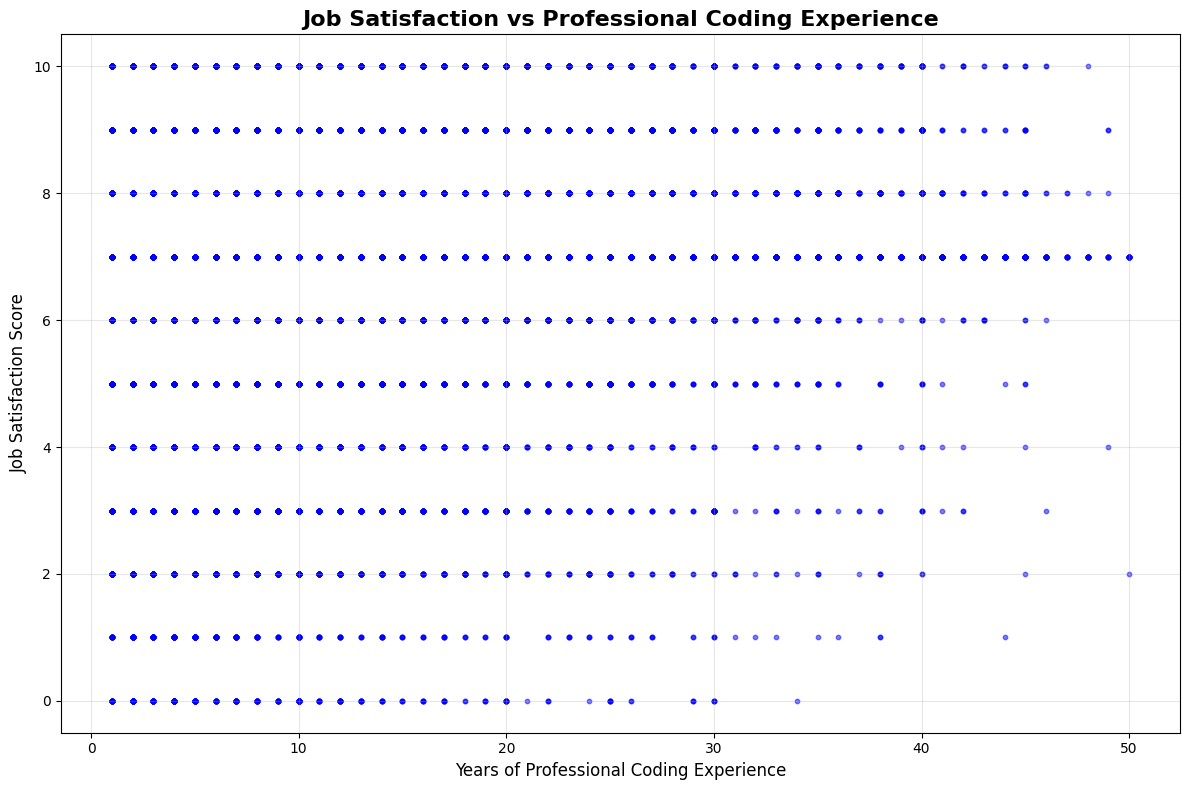


ADDITIONAL ANALYSIS: Satisfaction by Experience Ranges
Satisfaction by Experience Range:
                 mean  median  count
ExperienceRange                     
0-2              6.84     7.0   6807
2-5              6.84     7.0  10834
5-10             6.96     7.0  12653
10-15            7.06     7.0   6933
15-20            7.09     7.0   4692
20-30            7.16     7.0   4983
30+              7.22     7.0   1802


/tmp/ipykernel_1469/2481920800.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['ExperienceRange'] = pd.cut(valid_data['YearsCodePro_numeric'], bins=bins, labels=labels)
/tmp/ipykernel_1469/2481920800.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_stats = valid_data.groupby('ExperienceRange')['JobSat_numeric'].agg(['mean', 'median', 'count']).round(2)


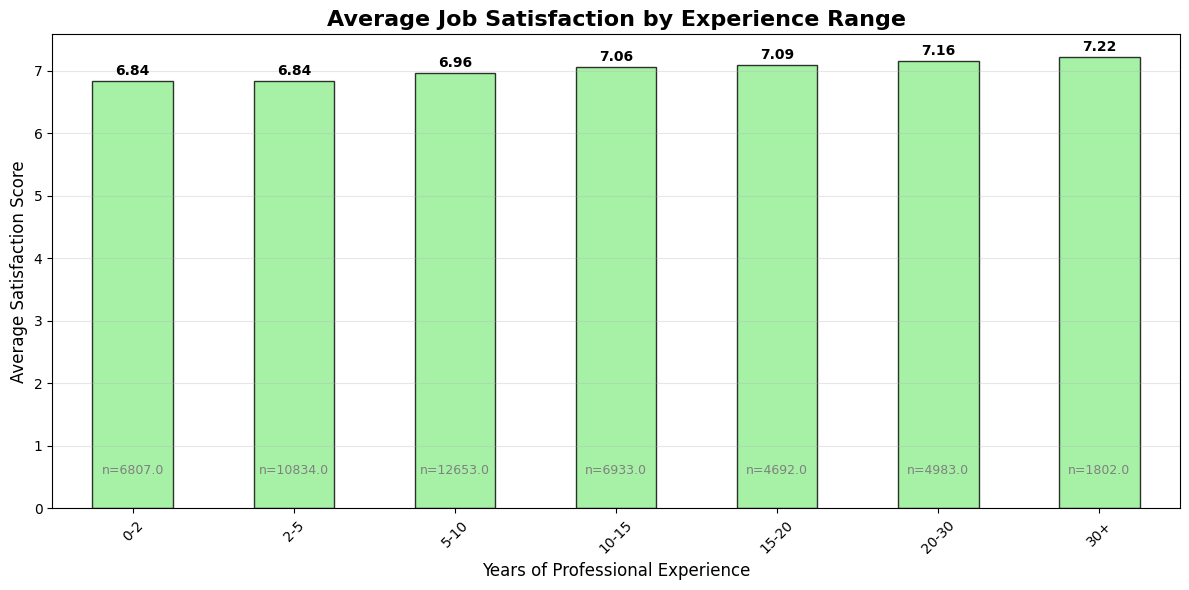

In [24]:
# Step 8: Correlation between Job Satisfaction and Experience (Corrected)
print("=== STEP 8: CORRELATION BETWEEN JOB SATISFACTION AND EXPERIENCE ===\n")

import numpy as np

# Install scipy if not available
try:
    import scipy.stats
except ImportError:
    !pip install scipy
    import scipy.stats

if 'JobSat' in df.columns and 'YearsCodePro' in df.columns:
    # Convert both columns to numeric
    df['JobSat_numeric'] = pd.to_numeric(df['JobSat'], errors='coerce')
    
    # Convert YearsCodePro to numeric
    def convert_experience(value):
        if pd.isna(value) or value == 'Unknown':
            return np.nan
        if isinstance(value, str):
            if 'Less than 1' in value.lower():
                return 0.5
            elif 'More than 50' in value.lower():
                return 55
        try:
            return float(value)
        except:
            return np.nan
    
    df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_experience)
    
    # Filter valid data
    valid_data = df.dropna(subset=['JobSat_numeric', 'YearsCodePro_numeric'])
    
    if len(valid_data) > 0:
        # Calculate Pearson correlation
        pearson_corr = valid_data['JobSat_numeric'].corr(valid_data['YearsCodePro_numeric'])
        
        # Calculate Spearman correlation manually if scipy is available
        try:
            spearman_corr = valid_data['JobSat_numeric'].corr(valid_data['YearsCodePro_numeric'], method='spearman')
        except:
            # Fallback: calculate Spearman using scipy directly
            spearman_corr = scipy.stats.spearmanr(valid_data['JobSat_numeric'], valid_data['YearsCodePro_numeric']).correlation
        
        print(f"Pearson correlation coefficient: {pearson_corr:.3f}")
        print(f"Spearman correlation coefficient: {spearman_corr:.3f}")
        
        # Interpret correlation
        print("\nCORRELATION INTERPRETATION:")
        if abs(pearson_corr) < 0.1:
            print("• Very weak or no linear relationship")
        elif abs(pearson_corr) < 0.3:
            print("• Weak linear relationship")
        elif abs(pearson_corr) < 0.5:
            print("• Moderate linear relationship")
        else:
            print("• Strong linear relationship")
        
        if pearson_corr > 0:
            print("• Positive correlation: Satisfaction tends to increase with experience")
        elif pearson_corr < 0:
            print("• Negative correlation: Satisfaction tends to decrease with experience")
        else:
            print("• No correlation: Experience and satisfaction are unrelated")
        
        # Create scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(valid_data['YearsCodePro_numeric'], valid_data['JobSat_numeric'], 
                   alpha=0.5, s=10, color='blue')
        plt.title('Job Satisfaction vs Professional Coding Experience', fontsize=16, fontweight='bold')
        plt.xlabel('Years of Professional Coding Experience', fontsize=12)
        plt.ylabel('Job Satisfaction Score', fontsize=12)
        plt.grid(alpha=0.3)
        
        # Add correlation line if significant
        if abs(pearson_corr) > 0.1:
            z = np.polyfit(valid_data['YearsCodePro_numeric'], valid_data['JobSat_numeric'], 1)
            p = np.poly1d(z)
            plt.plot(valid_data['YearsCodePro_numeric'], p(valid_data['YearsCodePro_numeric']), 
                    "r--", alpha=0.8, label=f'Correlation: {pearson_corr:.3f}')
            plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Additional analysis: satisfaction by experience ranges
        print("\nADDITIONAL ANALYSIS: Satisfaction by Experience Ranges")
        
        # Create experience bins
        bins = [0, 2, 5, 10, 15, 20, 30, 50]
        labels = ['0-2', '2-5', '5-10', '10-15', '15-20', '20-30', '30+']
        valid_data['ExperienceRange'] = pd.cut(valid_data['YearsCodePro_numeric'], bins=bins, labels=labels)
        
        exp_stats = valid_data.groupby('ExperienceRange')['JobSat_numeric'].agg(['mean', 'median', 'count']).round(2)
        print("Satisfaction by Experience Range:")
        print(exp_stats)
        
        # Visualize satisfaction by experience range
        plt.figure(figsize=(12, 6))
        exp_stats['mean'].plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.8)
        plt.title('Average Job Satisfaction by Experience Range', fontsize=16, fontweight='bold')
        plt.xlabel('Years of Professional Experience', fontsize=12)
        plt.ylabel('Average Satisfaction Score', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        
        # Add value labels
        for i, (idx, row) in enumerate(exp_stats.iterrows()):
            plt.text(i, row['mean'] + 0.05, f'{row["mean"]:.2f}', ha='center', va='bottom', fontweight='bold')
            plt.text(i, 0.5, f'n={row["count"]}', ha='center', va='bottom', fontsize=9, color='gray')
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("Insufficient valid data for correlation analysis")
        print(f"Valid JobSat values: {df['JobSat_numeric'].notna().sum()}")
        print(f"Valid YearsCodePro values: {df['YearsCodePro_numeric'].notna().sum()}")
        
else:
    print("Required columns (JobSat and/or YearsCodePro) not found")
    print("Available columns:", df.columns.tolist())
    

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


=== STEP 9: EMPLOYMENT VS. EDUCATION LEVEL ANALYSIS ===

Employment Status by Education Level (% by row):


EmploymentClean,"Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time",...,"Student, full-time;Not employed, but looking for work;Student, part-time","Student, full-time;Retired","Student, full-time;Student, part-time","Student, full-time;Student, part-time;Employed, part-time","Student, full-time;Student, part-time;Retired","Student, part-time","Student, part-time;Employed, part-time","Student, part-time;Retired","Unemployed, not seeking","Unemployed, seeking work"
EducationClean,,,,,,,,,,,,,,,,,,,,,
Associate degree,0.5,5.8,0.6,0.0,0.0,0.0,0.0,0.0,0.3,0.0,...,0.0,0.0,0.1,0.0,0.0,0.7,1.3,0.0,0.5,4.1
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.4,5.5,0.3,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.7,0.0,0.6,3.9
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.4,6.2,0.3,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.4,2.5
Other,0.3,4.4,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.0,...,0.1,0.0,0.5,0.0,0.0,1.8,1.5,0.1,3.1,5.5
Primary school,0.1,2.2,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.4,0.1,0.1,4.2,0.3,0.0,7.1,4.5
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",0.3,5.4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.5,2.2
Secondary school,0.2,3.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.2,0.0,0.0,2.4,1.7,0.0,2.5,3.5
Some college/university study without earning a degree,0.2,6.4,0.2,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.1,0.0,0.1,0.1,0.0,1.0,1.3,0.0,1.1,4.1
Unknown,0.3,4.5,0.3,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.1,0.0,0.0,1.4,0.8,0.0,1.2,4.6


/tmp/ipykernel_1469/2813486155.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

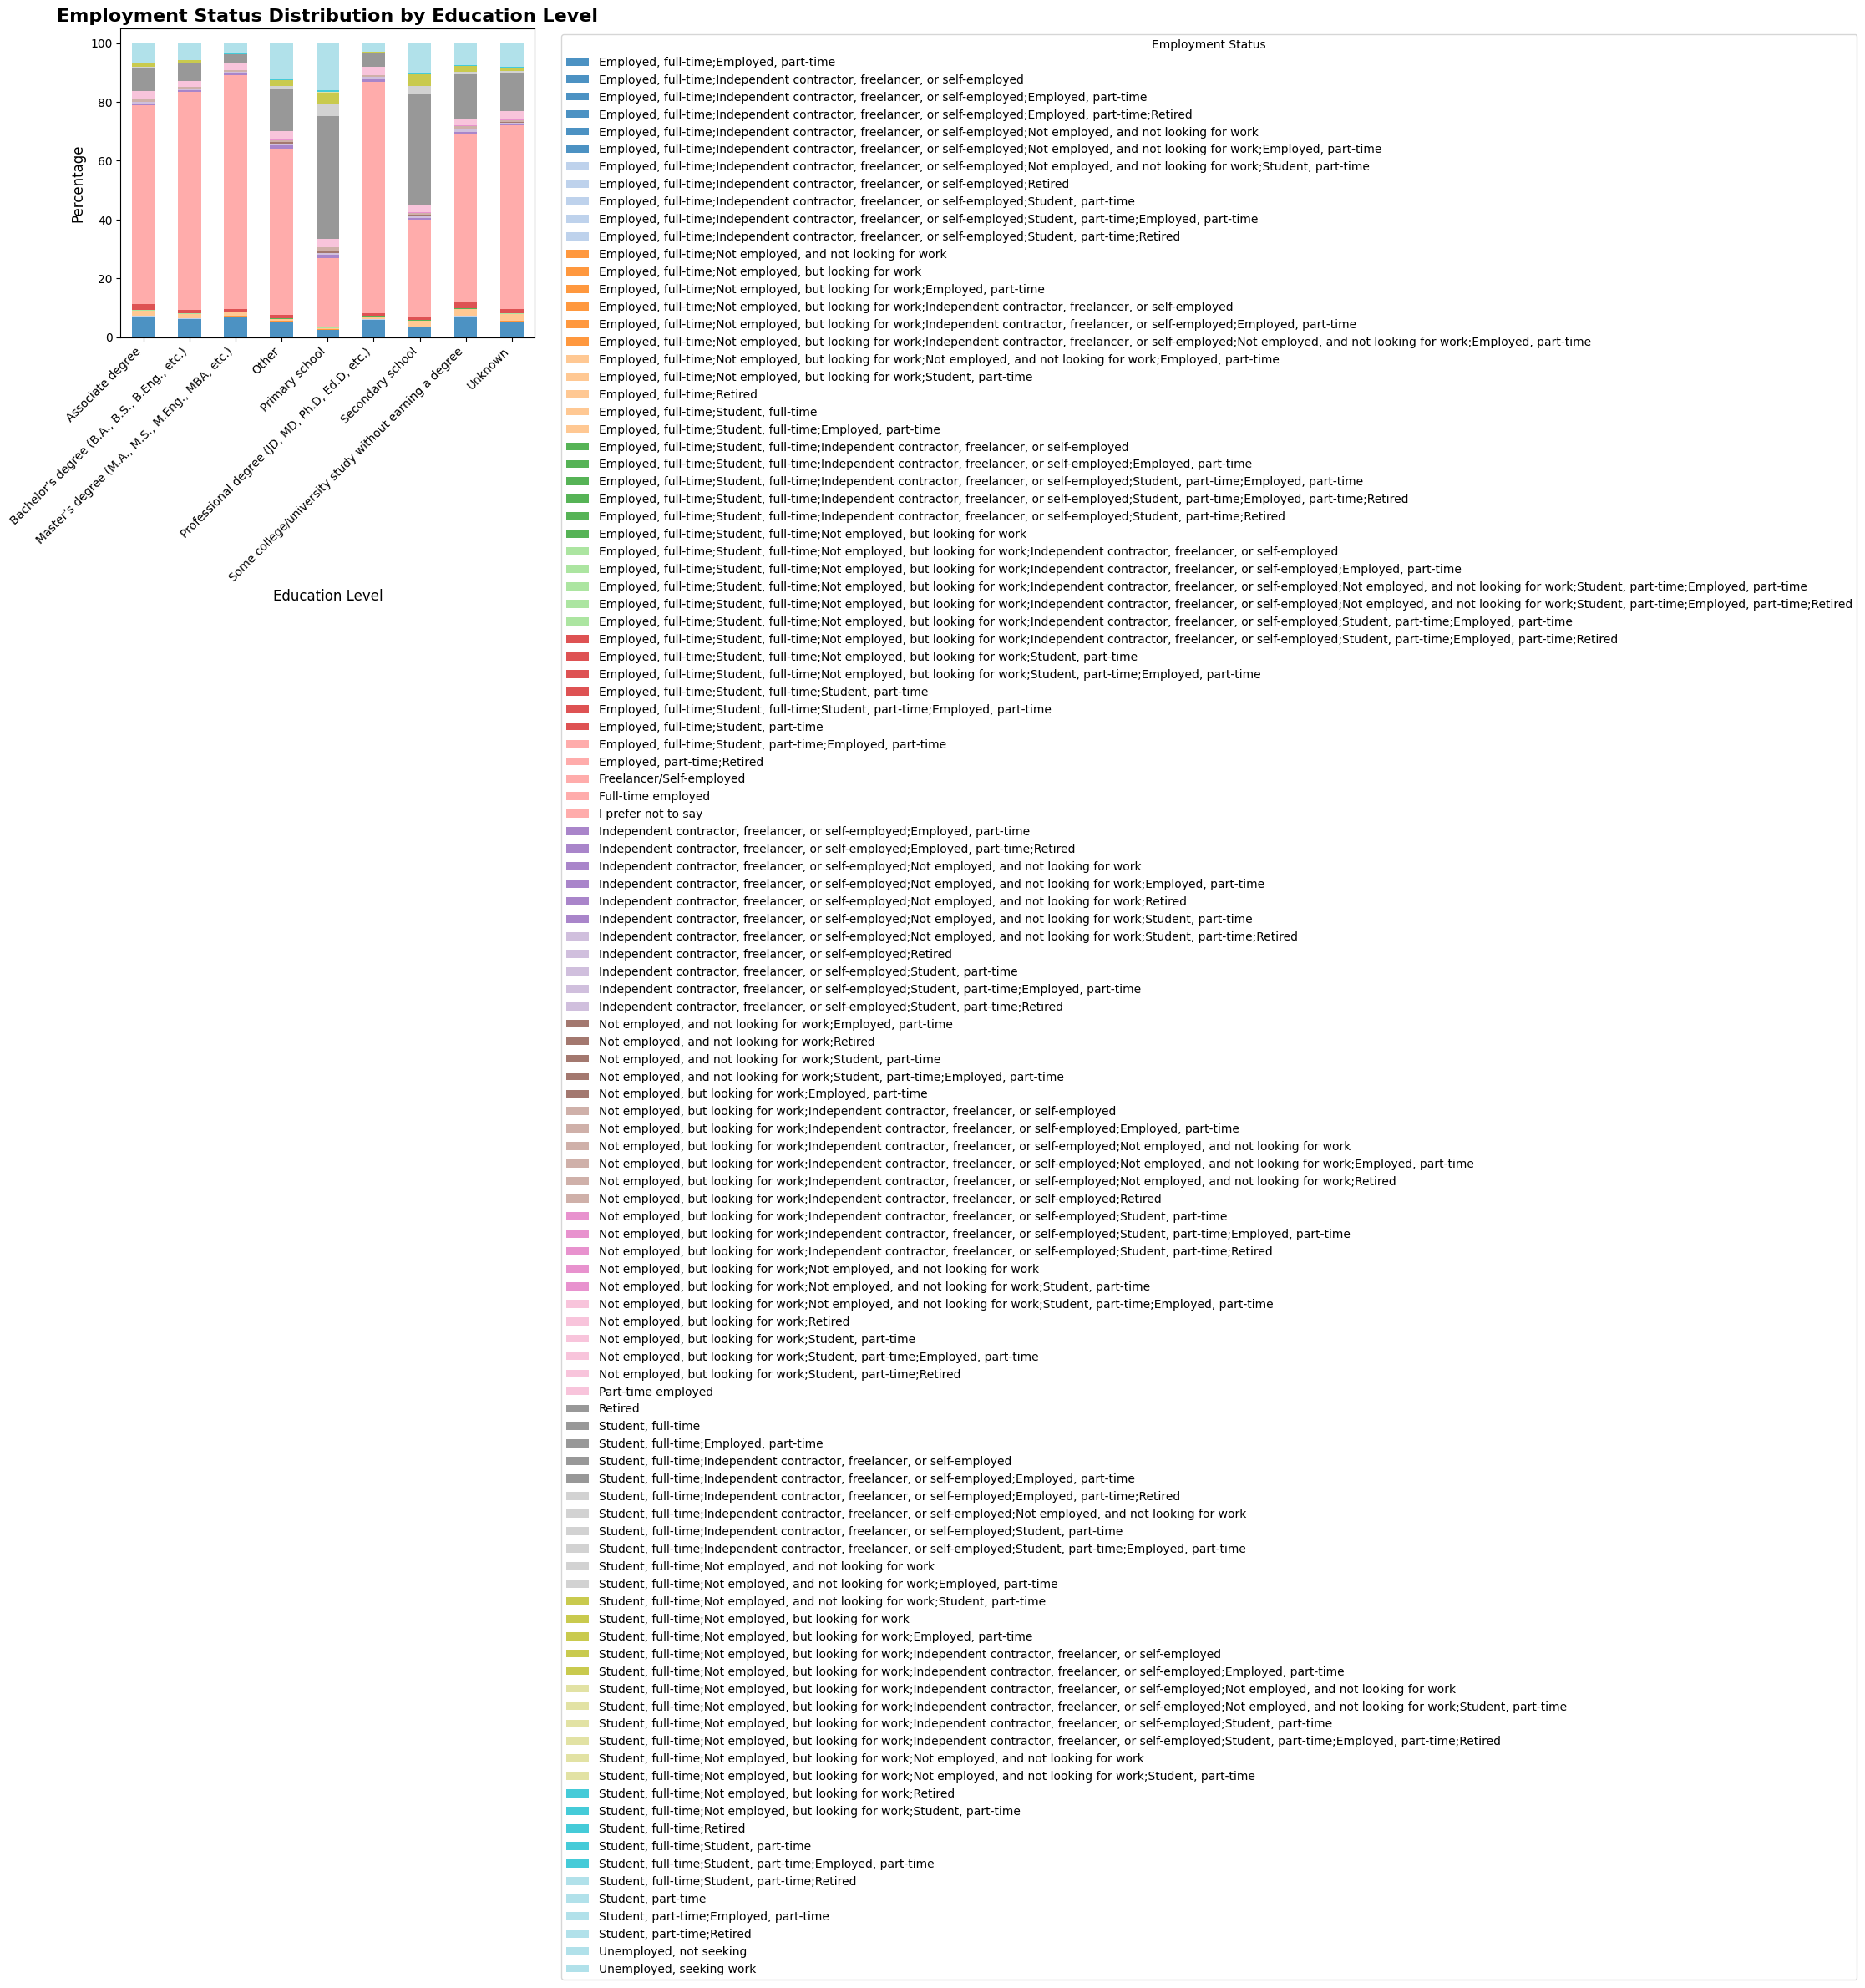

KEY INSIGHTS:
• Associate degree: Full-time employed (59.1%)
• Bachelor’s degree (B.A., B.S., B.Eng., etc.): Full-time employed (67.4%)
• Master’s degree (M.A., M.S., M.Eng., MBA, etc.): Full-time employed (70.8%)
• Other: Full-time employed (40.5%)
• Primary school: Student, full-time (36.4%)
• Professional degree (JD, MD, Ph.D, Ed.D, etc.): Full-time employed (69.8%)
• Secondary school: Student, full-time (29.6%)
• Some college/university study without earning a degree: Full-time employed (46.8%)
• Unknown: Full-time employed (54.1%)


In [22]:
# Step 9: Cross-tabulation Analysis (Employment vs. Education Level)
print("=== STEP 9: EMPLOYMENT VS. EDUCATION LEVEL ANALYSIS ===\n")

if 'Employment' in df.columns and 'EdLevel' in df.columns:
    # Clean education levels
    education_mapping = {
        'Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's degree",
        'Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master's degree",
        'Other doctoral degree (Ph.D., Ed.D., etc.)': "Doctoral degree",
        'Associate degree (A.A., A.S., etc.)': "Associate degree",
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': "Secondary school",
        'Primary/elementary school': "Primary school",
        'Something else': "Other",
        'Unknown': "Unknown"
    }
    
    df['EducationClean'] = df['EdLevel'].map(education_mapping).fillna(df['EdLevel'])
    
    # Clean employment types
    employment_mapping = {
        'Employed, full-time': "Full-time employed",
        'Independent contractor, freelancer, or self-employed': "Freelancer/Self-employed",
        'Employed, part-time': "Part-time employed",
        'Not employed, but looking for work': "Unemployed, seeking work",
        'Not employed, and not looking for work': "Unemployed, not seeking",
        'Retired': "Retired",
        'Student': "Student"
    }
    
    df['EmploymentClean'] = df['Employment'].map(employment_mapping).fillna(df['Employment'])
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(df['EducationClean'], df['EmploymentClean'], normalize='index') * 100
    
    print("Employment Status by Education Level (% by row):")
    display(cross_tab.round(1))
    
    # Visualization
    plt.figure(figsize=(16, 10))
    cross_tab.plot(kind='bar', stacked=True, colormap='tab20', alpha=0.8)
    plt.title('Employment Status Distribution by Education Level', fontsize=16, fontweight='bold')
    plt.xlabel('Education Level', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Key insights
    print("KEY INSIGHTS:")
    for education_level in cross_tab.index:
        most_common_employment = cross_tab.loc[education_level].idxmax()
        percentage = cross_tab.loc[education_level].max()
        print(f"• {education_level}: {most_common_employment} ({percentage:.1f}%)")
        
else:
    print("Required columns (Employment and/or EdLevel) not found")

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [23]:
# Step 10: Export Cleaned Data
print("=== STEP 10: EXPORT CLEANED DATA ===\n")

# Perform final data cleaning
print("Performing final data cleaning...")

# Handle remaining missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna('Unknown', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print(f"Remaining missing values: {df.isnull().sum().sum()}")

# Save to CSV
output_filename = 'cleaned_survey_data.csv'
df.to_csv(output_filename, index=False)

print(f"✓ Cleaned dataset saved as '{output_filename}'")
print(f"✓ File size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"✓ Number of rows: {len(df)}")
print(f"✓ Number of columns: {len(df.columns)}")

print("\nDataset includes the following cleaned columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n✅ DATA EXPORT COMPLETE!")

=== STEP 10: EXPORT CLEANED DATA ===

Performing final data cleaning...


/tmp/ipykernel_1469/201908846.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Remaining missing values: 0
✓ Cleaned dataset saved as 'cleaned_survey_data.csv'
✓ File size: 491.14 MB
✓ Number of rows: 65437
✓ Number of columns: 118

Dataset includes the following cleaned columns:
 1. ResponseId
 2. MainBranch
 3. Age
 4. Employment
 5. RemoteWork
 6. Check
 7. CodingActivities
 8. EdLevel
 9. LearnCode
10. LearnCodeOnline
11. TechDoc
12. YearsCode
13. YearsCodePro
14. DevType
15. OrgSize
16. PurchaseInfluence
17. BuyNewTool
18. BuildvsBuy
19. TechEndorse
20. Country
21. Currency
22. CompTotal
23. LanguageHaveWorkedWith
24. LanguageWantToWorkWith
25. LanguageAdmired
26. DatabaseHaveWorkedWith
27. DatabaseWantToWorkWith
28. DatabaseAdmired
29. PlatformHaveWorkedWith
30. PlatformWantToWorkWith
31. PlatformAdmired
32. WebframeHaveWorkedWith
33. WebframeWantToWorkWith
34. WebframeAdmired
35. EmbeddedHaveWorkedWith
36. EmbeddedWantToWorkWith
37. EmbeddedAdmired
38. MiscTechHaveWorkedWith
39. MiscTechWantToWorkWith
40. MiscTechAdmired
41. ToolsTechHaveWorkedWith
42. Too

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
